In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix 


## Шаг 1. Загрузка данных и знакомство с ними

In [2]:

#Используем конструкцию try except:

try:
    # Твой локальный путь к файлу, который открывается у тебя
    info = pd.read_csv('C:/Users/elena.kim/Downloads/выгрузки для DT_SC/rest_info.csv')
    price = pd.read_csv('C:/Users/elena.kim/Downloads/выгрузки для DT_SC/rest_price.csv')
except:
    # Путь к файлу который открывается в тренажёре/у ревьювера
    info = pd.read_csv('/datasets/rest_info.csv')
    price = pd.read_csv('/datasets/rest_price.csv')

In [3]:
import os
print(os.path.exists('C:/Users/elena.kim/Downloads/выгрузки для DT_SC/rest_info.csv'))


True


In [4]:
#Анализируем набор типов и заполненность данных 
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


В датафрейме info всего 8 406 строк и 9 колонок из них 2 колонки вещественного формата, 1 колонка содержит целочисленные значения 6 - формата object. 


In [5]:
# Выводим первые строки датафрейма на экран
info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
print(info.isna().mean())

id          0.000000
name        0.000000
category    0.000000
address     0.000000
district    0.000000
hours       0.063764
rating      0.000000
chain       0.000000
seats       0.429574
dtype: float64


Не хватает около 6% данных в столбце hours и 43% данных в столбце количества посадочных мест. 
Для оптимизации кода можно seats перевести целочисленный формат, а в значениях в столбцах рейтинг rating и принадлежность сети chain понизить разрятдность

In [7]:
info['seats'] = info['seats'].round(0)


In [8]:
info['seats'] = info['seats'].astype('Int64')
info['seats'] = pd.to_numeric(info['seats'], downcast='integer')
info['chain'] = pd.to_numeric(info['chain'], downcast='integer')
info['rating'] = pd.to_numeric(info['rating'], downcast='float')

In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float32
 7   chain     8406 non-null   int8   
 8   seats     4795 non-null   Int16  
dtypes: Int16(1), float32(1), int8(1), object(6)
memory usage: 459.8+ KB


In [10]:
price.info()
print(price.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB
id                   0.000000
price                0.183095
avg_bill             0.059635
middle_avg_bill      0.224002
middle_coffee_cup    0.868162
dtype: float64


В датафрейме price 4058 строк, однако данных по столбцам не хватает, значения по столбцу middle_coffee_cup заполнены всего на 13%

In [11]:
price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Также понижаем разрядность значений в столбцах middle_avg_bill и middle_coffee_cup

In [12]:
price['middle_avg_bill']=pd.to_numeric(price['middle_avg_bill'], downcast='float')
price['middle_coffee_cup']=pd.to_numeric(price['middle_coffee_cup'], downcast='float')

In [13]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float32
 4   middle_coffee_cup  535 non-null    float32
dtypes: float32(2), object(3)
memory usage: 126.9+ KB


Объединяем два датафрейма по методу left 

In [14]:
merged=info.merge(price, on='id', how='left')

## Шаг 2. Предобработка данных


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: Int16(1), float32(3), int8(1), object(8)
memory usage: 656.8+ KB


In [16]:
merged.head(500)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49aa522a540043fc881bbd655d1e129d,One Price Coffee,кофейня,"Москва, Фестивальная улица, 2А",Северный административный округ,"пн-пт 07:00–23:00; сб,вс 08:00–23:00",4.0,1,189,NaN,NaN,NaN,NaN
496,4394ee41e738453aa0be126e0192bb49,Чайхана Регар,столовая,"Москва, Флотская улица, 17, стр. 2",Северный административный округ,"ежедневно, 09:00–23:00",4.2,0,50,средние,Средний счёт:200–300 ₽,250.0,NaN
497,25f29947099941719f9ad7d237d0e1a6,Самарканд,кафе,"Москва, Волоколамское шоссе, 110",Северо-Западный административный округ,"ежедневно, 08:00–23:00",4.4,1,<NA>,NaN,NaN,NaN,NaN
498,057a045049ff45868a5eb37fbd4e9edf,Донер Кебаб,быстрое питание,"Москва, бульвар Яна Райниса, 8",Северо-Западный административный округ,"ежедневно, круглосуточно",4.2,1,1,NaN,NaN,NaN,NaN


Дропаем дубликаты

In [17]:
merged.drop_duplicates()
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: Int16(1), float32(3), int8(1), object(8)
memory usage: 656.8+ KB


In [18]:
#Проанализируем есть ли неявные дубликаты? Приведем все записи формата object к нижнему регистру
for col in ['name', 'category', 'address', 'district', 'hours']:
    merged[col] = merged[col].str.lower()

In [19]:
#Уберем возможные пробелы до и после названий
for col in ['name', 'category', 'address', 'district', 'hours']:
    merged[col] = merged[col].str.strip()

In [20]:
merged.drop_duplicates()
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: Int16(1), float32(3), int8(1), object(8)
memory usage: 656.8+ KB


Делаем расчет количества ежедневных и круглосуточных заведений

In [21]:
mask = merged['hours'].str.contains('круглосуточно|24 часа|00:00–23:59|0:00–24:00', case=False, na=False) & \
       merged['hours'].str.contains('ежедневно', case=False, na=False)
#print (mask)
count = mask.sum()

print(f"Количество записей со словами 'круглосуточно' и 'ежедневно': {count}")


Количество записей со словами 'круглосуточно' и 'ежедневно': 730


In [22]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_24_7(x):
    if not isinstance(x, str):
        return 0
    x = x.lower()
    if 'ежедневно' in x and 'круглосуточно' in x:
        return 1
    else:
        return 0


In [23]:
merged['is_24_7'] = merged['hours'].apply(create_is_24_7)

In [24]:
merged.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,0


# Шаг 3. Исследовательский анализ данных


## Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.


In [25]:
merged.groupby('category')['id'].count()

category
бар,паб             765
булочная            256
быстрое питание     603
кафе               2378
кофейня            1413
пиццерия            633
ресторан           2043
столовая            315
Name: id, dtype: int64

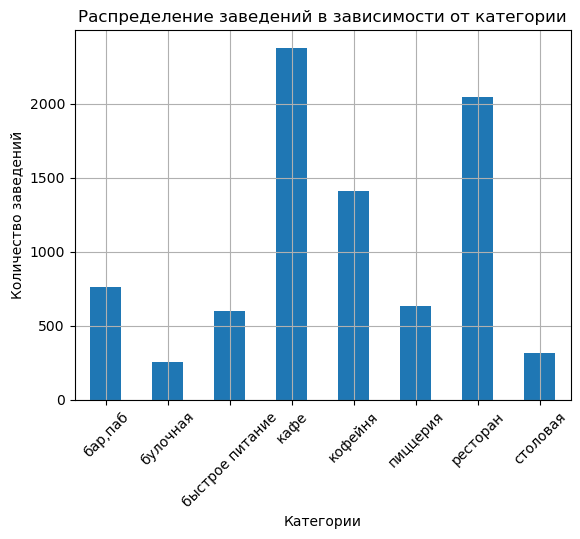

In [26]:
merged.groupby('category')['id'].count().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

Исходя из представленных данных наиболее многочисленные категории заведений в Москве, это : 
1. Рестораны 
2. Кафе 
3. Кофейни 

## Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.


In [27]:
replace_dict = {
    'восточный административный округ': 'ВАО',
    'западный административный округ': 'ЗАО',
    'северный административный округ': 'САО',
    'северо-восточный административный округ': 'СВАО',
    'северо-западный административный округ': 'СЗАО',
    'центральный административный округ': 'ЦАО',
    'юго-восточный административный округ': 'ЮВАО',
    'юго-западный административный округ': 'ЮЗАО',
    'южный административный округ': 'ЮАО',
}

merged['district_short'] = merged['district'].replace(replace_dict)

In [28]:
merged.groupby('district_short')['id'].count()

district_short
ВАО      798
ЗАО      851
САО      900
СВАО     891
СЗАО     409
ЦАО     2242
ЮАО      892
ЮВАО     714
ЮЗАО     709
Name: id, dtype: int64

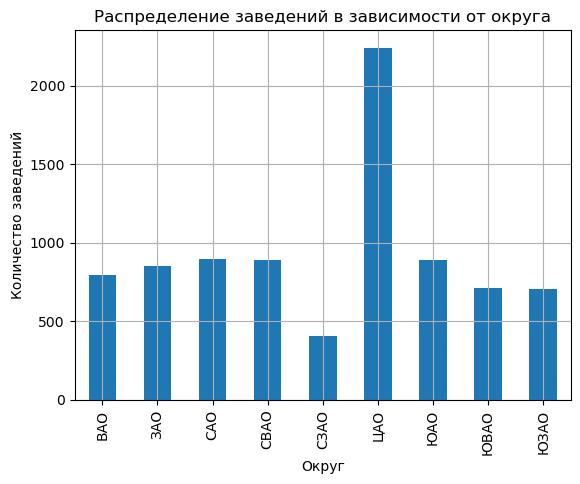

In [29]:
merged.groupby('district_short')['id'].count().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от округа'
)

# Настраиваем оформление графика
plt.xlabel('Округ')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

Исходя из представленных данных наибольшее количество заведений в Москве: 
1. ЦАО
2. САО, СВАО, ЮАО 
Наименьшее кол-во в СЗАО

In [ ]:
filtered_bydistrict = merged[merged['district'] == 'центральный административный округ']
print (filtered_bydistrict.groupby('category')['id'].count())
filtered_bydistrict.groupby('category')['id'].count().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

В ЦАО больше всего ресторанов, кафе и кофеен, что соответствует общему распределению по всей Москве, однако пабов относительно общему распределению в центре Москвы больше 

## Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.


In [ ]:
chain_total= merged['chain'].sum()
print (f'всего сетевых заведений:', chain_total)
chain_share= merged['chain'].mean()*100
print (f'доля сетевых заведений:', chain_share)
pivot_chain = pd.pivot_table(merged, index='category', columns='chain', values='id', aggfunc='count' )
print(pivot_chain)

In [ ]:
merged.groupby('chain')['id'].count().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от принадлежности сети'
)

# Настраиваем оформление графика
plt.xlabel('Сеть:ДА/НЕТ')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

Доля сетевых заведений составляет 38% от общего количества или 3205 

In [ ]:
filtered_bychain=merged[merged['chain']==1]

In [ ]:
filtered_bychain.groupby('category')['id'].count().plot(kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение по категориям внутри сетевых'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

Внутри сетевых заведений наиболее крупные категории: 
1. Кафе
2. Рестораны
3. Кофейни

## Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [ ]:
#def mean_seats ()

#merged['seats'] = merged['seats'].astype(float)


#merged['seats'] = merged['seats'].fillna(
 #   merged.groupby('category')['seats'].transform('median')
#)

merged.info()

In [ ]:
print ((merged['seats']==0).sum())

Поскольку почти 50%  заведений в таблице без указания кол-ва посадочных мест, то попробовала заменить значения NaN на медианное значение внутри категории, также есть и такие заведения, где в качестве кол-ва посадочных мест указан 0, возможно так оно и есть, поэтому 0 оставляем без изменений. Однако, такая трансформация данных привела к одинаковым значениям медианы и среднего и поэтому искажает анализ - закоментила код, продолжаем анализ на существующих данных  

In [ ]:
# Построим распределение данных для столбца `seats`


plt.figure(figsize=(10, 10))
sns.boxplot(data=merged, x='seats', y='category')
plt.title('Распределение seats по категориям')
plt.show()
# Подписываем и отображаем график

plt.suptitle('Совместное распределение данных в столбцах seats и category')
plt.tight_layout()
plt.show()

In [ ]:
def data_range(x):
    return x.max() - x.min()

summary = merged.groupby('category')['seats'].agg(['median', 'mean', 'max', 'min', 'count', data_range])
#summary = summary.rename(columns={'data_range': 'range'})

print(summary)


Медиана  во всех категориях меньше, чем средняя, это значит, что есть выбросы в большую стороно, очень странно выглядят максимальные значения посадочных мест - одинаково почти для всех категорий, надо проверить

In [ ]:
print (merged[merged['seats']==1288].head(5))

Аномалия состоит в том, что по адресу проспект вернадского 97к1 - находится почему то 2 разных заведения 

## Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?


In [ ]:
merged.groupby('category')['rating'].mean()

In [ ]:
sns.boxplot(data=merged, x='rating', y='category')

Средний рейтинг для всех заведений примерно на уровне 4-4.3, однако выбросы есть и в большую и в меньшую сторону 

## Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.


In [ ]:
corr_columns = [
    'rating',
    'category',
    'district',
    'chain', 
    'seats', 
    'is_24_7',
    'price']

# Считаем матрицу корреляций
correlation_matrix = merged[corr_columns].phik_matrix(interval_cols=['chain', 'rating', 'seats', 'is_24_7'])

# Задаём размер графика
print (correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()

Сильной корреляции между данными не наблюдается, есть средняя корреляция между категорией и принадлежности ценовому сегменту - 0,57 и слабая корреляция есть между количеством посадочных мест и районом, равна 0.35 

## Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.


In [ ]:
top = filtered_bychain.groupby(['category','name']). agg({'id':'count', 'rating':'mean'})
top15 = top.sort_values(by='id', ascending=False).head(15)

print(top15)


Самая крупная сеть в Москве - Шоколадница с количеством точек - 119 и рейтингом 4.2,  далее с большим отрывом по численности идут две пиццерии домино'c пицца и додо пицца с практически одинаковым рейтингом 

In [ ]:
top15['id'].plot(kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Top15 по количеству точек'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Название сети')
# Добавляем сетку графика
plt.grid()

## Изучите вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [ ]:
bill_analysis=merged.groupby(['district', 'category'])['middle_avg_bill'].describe().reset_index()

In [ ]:
print (bill_analysis)

Довольно много данных, возьмем для сравнения наиболее крупную категорию ресторан

In [ ]:
filtered_bycategory=merged[merged['category']=='ресторан']

In [ ]:
filtered_bycategory.groupby('district_short')['middle_avg_bill'].describe()

Самый крупный чек в ЦАО, 1561 руб, затем в ЗАО и в ЮАО

In [ ]:
sns.boxplot(data=filtered_bycategory, x='middle_avg_bill', y='district_short')

График практически нечитаемый, из за выброса в среднем чеке 35000 в ЮАО, чтобы сделать график более читаемым удалим это значение

In [ ]:
filtered_bybill=filtered_bycategory[filtered_bycategory['middle_avg_bill']<=10000]

In [ ]:
sns.boxplot(data=filtered_bybill, x='middle_avg_bill', y='district_short')

In [ ]:
bill_CAO=filtered_bydistrict.groupby('category')['middle_avg_bill'].describe()
print (bill_CAO)

In [ ]:
sns.boxplot(data=filtered_bydistrict, x='middle_avg_bill', y='category')

В ЦАО наиболее крупный средний чек в ресторане, далее в баре/пабе, однако странно то, что 75ый перцентиль в булочных выше, чем у всех остальных категорий заведений

# Шаг 4. Итоговый вывод и рекомендации


## 1.     Общий обзор проделанной работы.

1. выгрузила необходимые библиотеки
2. изучила dataframe info и price: описала структуру данных, оптимизировала форматы
3. объединила таблицы info и price методом left
4. изучила структуру данных новой таблицы, проверила на явные и неявные дубликаты, добавила столбец с указанием на круглосуточный и ежедневный режим работы заведений, привела к короткому виду названия округов 
5. сделала аналитику и визуализацию по:
        - количественному распределению категорий заведений в Москве
        - количественному распределению категорий заведений в Москве в разрезе округов, а также в разрезе категорий в ЦАО
        - количественному распределению категорий заведений в Москве в разрезе принадлежности сети
        - количеству посадочных мест, среднему количеству посадочных мест типичному для каждой категории
        - распределению рейтингов внутри каждой категории
        - корреляции данных: категория, округ Москвы, принадлежности сети, ценовой сегмент, признак круглосуточной работы
        - топ 15 популярных сетей в Москве, численности их точек
        - величине среднего чека. 


## 2. Ответы на исследовательские вопросы, или главные выводы:
1. Наличие данных неравномерно, в табл. info 8406 строк, а price только 4058, в отдельных столбцах данных не хватает а уровне 50% (seats) или даже 87% (данные по среднему чеку за кофе)
2. Хотя нет явных дубликатов, есть неявные, так обнаружилось, что на просп Вернадского по одному и тому же адресу находятся разные заведения
3. Касательно выводов по данным:
    1. Исходя из представленных данных наиболее многочисленные категории заведений в Москве, это : 
        1. Рестораны 
        2. Кафе 
        3. Кофейни
    2. Исходя из представленных округов наибольшее количество заведений в Москве: 
        1. ЦАО
        2. САО, СВАО, ЮАО 
    Наименьшее кол-во в СЗАО
    3. В ЦАО больше всего ресторанов, кафе и кофеен, что соответствует общему распределению по всей Москве, однако пабов относительно общему      распределению в центре Москвы больше
    4. Доля сетевых заведений составляет 38% от общего количества или 3205
    5. Внутри сетевых заведений наиболее крупные категории:
        1. Кафе
        2. Рестораны
        3. Кофейни
    6. Медиана количества посадочных мест во всех категориях меньше, чем средняя, это значит, что есть выбросы в большую стороно, также очень странно выглядят максимальные значения посадочных мест - одинаково почти для всех категорий, анализ показал, что есть аномалии в данных
    7.  Средний рейтинг для всех категорий примерно на уровне 4-4.3, естественно выбросы есть и в большую и в меньшую сторону  
    8.  Сильной корреляции между данными не наблюдается, есть средняя корреляция между категорией и принадлежности ценовому сегменту - 0,57 и слабая корреляция есть между количеством посадочных мест и районом, равна 0.35
    9.  Самая крупная сеть в Москве - Шоколадница с количеством точек - 119 и рейтингом 4.2,  далее с большим отрывом по численности идут две пиццерии домино'c пицца и додо пицца с практически одинаковым рейтингом
    10.  В Москве самый крупный чек в категории ресторан в ЦАО, 1561 руб, затем в ЗАО и в ЮАО
    11.  В ЦАО наиболее крупный средний чек в ресторане, далее в баре/пабе, однако странно то, что 75ый перцентиль в булочных выше, чем у всех остальных категорий заведений
   



## 3.     Рекомендации на основе анализа данных:
    1. Улучшить качество и полноту данных
    2.  Основной упор делать на развитие и продвижение ресторанов, кафе и кофеен, так как это крупнейшие и наиболее востребованные сегменты рынка Москвы.
    3. Относительно маленькое кол-во заведений в СЗАО Москвы, если присматривать место для будущего заведения, можно начинать с этого округа, здесь также второй по величие средний чек после ЦАО
    4. Учитывая, что 38% заведений — сетевые, стратегически важно развивать именно этот сегмент, оптимизируя управленческие процессы и стандарты качества.
    5.  Работать над поддержанием и повышением рейтингов, сейчас максимальный средний - 4.3
    6.  В ЦАО и других ключевых округах использовать более высокий ценовой сегмент (учитывая высокий средний чек), развивать премиальные предложения.
    7.  Исследовать высокие 75-й перцентили в категориях булочных для понимания возможности премиального сегмента или ошибок записи.


